In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
import kagglehub
import os

apple_complete_path = kagglehub.dataset_download("khoongweihao/aaplcsv")
csv_file_path = os.path.join(apple_complete_path, 'AAPL.csv')

apple_complete_df = pd.read_csv(csv_file_path)
print("Path to dataset files:", apple_complete_path)

100%|██████████| 4.90k/4.90k [00:00<00:00, 8.46MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/khoongweihao/aaplcsv/versions/1


In [ ]:
apple_complete_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [ ]:
df = apple_complete_df.iloc[:,0:2]
df.head()

,Date,Open
0,2014-09-29,100.589996
1,2014-10-06,99.949997
2,2014-10-13,101.330002
3,2014-10-20,98.320000
4,2014-10-27,104.849998


In [ ]:
df.isnull().any()

,0
Date,False
Open,False


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0


In [ ]:
apple_processed = apple_complete_df.iloc[:,1:2].values

In [ ]:
apple_processed

array([[100.589996],
       [ 99.949997],
       [101.330002],
       [ 98.32    ],
       [104.849998],
       [108.220001],
       [109.019997],
       [114.269997],
       [116.849998],
       [118.809998],
       [114.099998],
       [110.699997],
       [112.160004],
       [113.790001],
       [108.290001],
       [112.599998],
       [107.839996],
       [113.739998],
       [118.050003],
       [118.550003],
       [127.489998],
       [130.020004],
       [129.25    ],
       [127.959999],
       [123.879997],
       [127.120003],
       [124.050003],
       [124.470001],
       [128.369995],
       [125.57    ],
       [132.309998],
       [129.5     ],
       [127.389999],
       [128.380005],
       [132.600006],
       [130.279999],
       [128.899994],
       [126.099998],
       [127.489998],
       [125.459999],
       [124.940002],
       [125.029999],
       [130.970001],
       [123.089996],
       [121.5     ],
       [116.529999],
       [116.040001],
       [ 94.8

In [ ]:
type(apple_complete_df)

pandas.core.frame.DataFrame

In [ ]:
type(apple_processed)

numpy.ndarray

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
apple_scaled = scaler.fit_transform(apple_processed)
apple_scaled

array([[0.0932878 ],
       [0.08600681],
       [0.10170653],
       [0.06746304],
       [0.14175199],
       [0.18009105],
       [0.18919225],
       [0.24891922],
       [0.27827077],
       [0.30056884],
       [0.24698522],
       [0.20830488],
       [0.22491475],
       [0.24345851],
       [0.18088741],
       [0.22992037],
       [0.1757679 ],
       [0.24288965],
       [0.2919227 ],
       [0.29761099],
       [0.39931742],
       [0.4281002 ],
       [0.4193402 ],
       [0.40466442],
       [0.35824801],
       [0.39510815],
       [0.3601821 ],
       [0.36496023],
       [0.40932877],
       [0.37747444],
       [0.45415247],
       [0.42218434],
       [0.39817978],
       [0.40944264],
       [0.45745176],
       [0.43105805],
       [0.41535833],
       [0.383504  ],
       [0.39931742],
       [0.37622301],
       [0.37030723],
       [0.37133108],
       [0.4389079 ],
       [0.34926051],
       [0.33117182],
       [0.27463028],
       [0.26905579],
       [0.028

In [ ]:
apple_scaled.shape

(184, 1)

In [ ]:
X_train = []
y_train = []

for i in range(60, len(apple_scaled)):
    X_train.append(apple_scaled[i-60:i, 0])
    y_train.append(apple_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - loss: 0.2061 - val_loss: 0.0075
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 0.0519 - val_loss: 0.0405
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0350 - val_loss: 0.1230
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0388 - val_loss: 0.0073
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.0210 - val_loss: 0.0443
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - loss: 0.0218 - val_loss: 0.0093
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 0.0154 - val_loss: 0.0146
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0176 - val_loss: 0.0168
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0121 - val_loss: 0.0384
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.0104 - val_loss: 0.0160
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.0123 - val_loss: 0.0070
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0

In [ ]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f"Final Training Loss (MSE): {train_loss}")

Final Training Loss (MSE): 0.004314401652663946


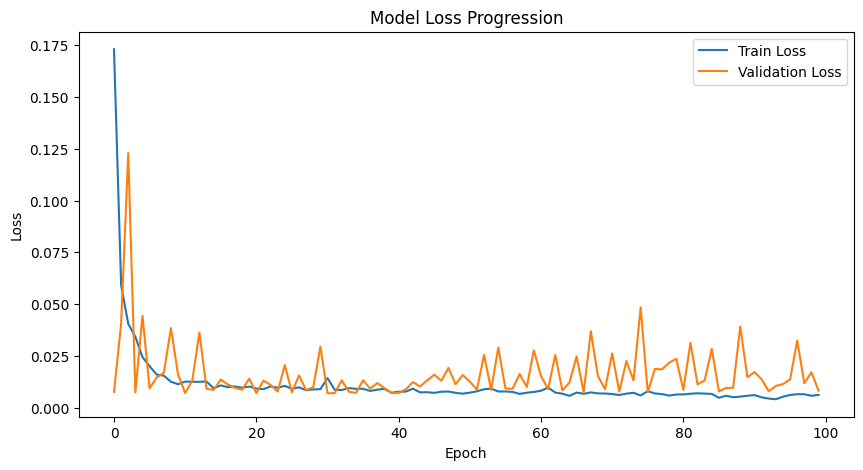

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


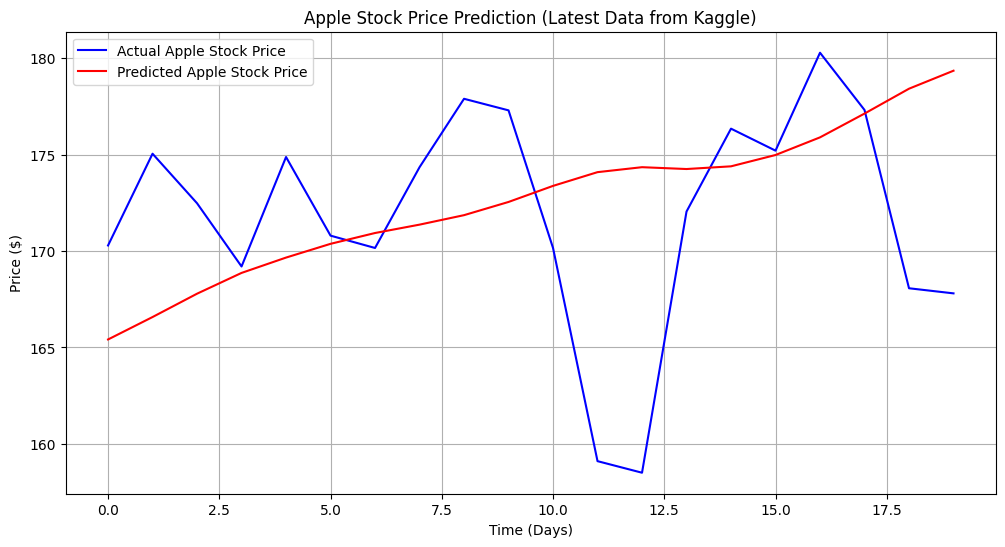

In [ ]:
test_data = apple_complete_df.tail(20)

apple_testing_processed = test_data.iloc[:, 1:2].values

apple_total = apple_complete_df['Open']
inputs = apple_total[len(apple_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 60 + len(test_data)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(12, 6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction (Latest Data from Kaggle)')
plt.xlabel('Time (Days)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# این خط باید بعد از تمام مراحل آموزش و تست باشد
model.save('apple_stock_model.h5')
print("Model saved successfully!")

✅ Model saved successfully as apple_stock_model.h5


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(apple_testing_processed, predicted_stock_price)
accuracy = 100 - (mape * 100)
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 96.92%


In [ ]:
last_60_days = apple_total[-60:].values.reshape(-1, 1)
last_60_days_scaled = scaler.transform(last_60_days)
X_tomorrow = np.array([last_60_days_scaled])
X_tomorrow = np.reshape(X_tomorrow, (X_tomorrow.shape[0], X_tomorrow.shape[1], 1))

tomorrow_prediction = model.predict(X_tomorrow)
tomorrow_price = scaler.inverse_transform(tomorrow_prediction)
print(f"Predicted Price for Tomorrow: ${tomorrow_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Price for Tomorrow: $179.91
